# Phase 3 Predictions

# First model

## 🛠️ Preprocessing

In [107]:
#Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pd.options.mode.chained_assignment = None

In [108]:
# Read df
df = pd.read_csv("finalDf.csv")

In [109]:
df.shape

(694, 14)

### 💡 Feature selection

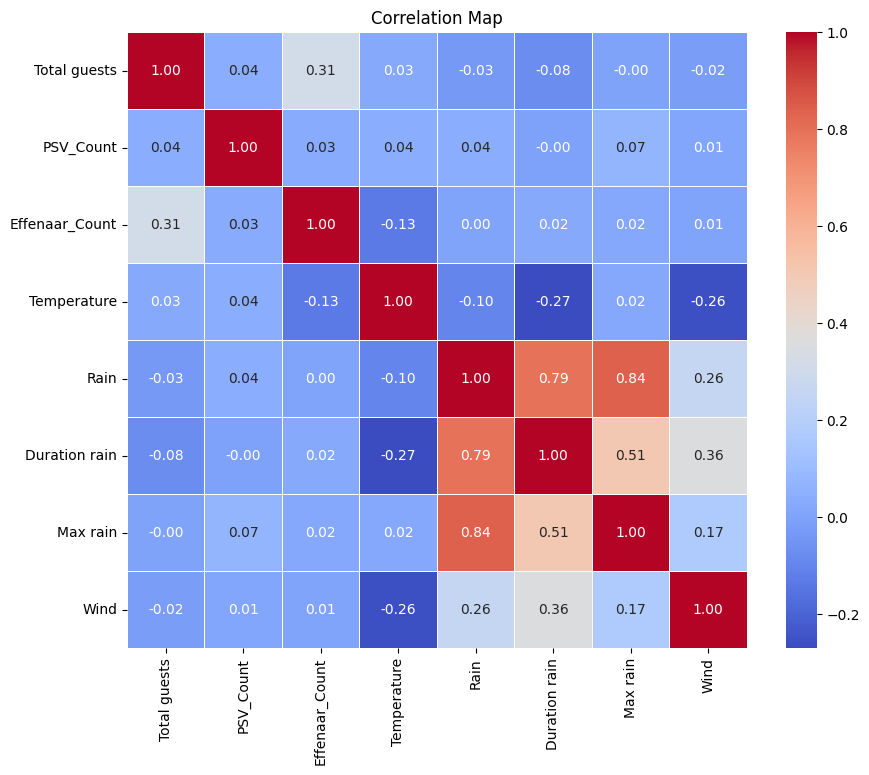

In [110]:
# Combine the relevant columns into a new DataFrame for correlation analysis
correlation_df = df[['Total guests', 'PSV_Count', 'Effenaar_Count', 'Temperature', 'Rain', 'Duration rain', 'Max rain', 'Wind']]

# Compute the correlation matrix
correlation_matrix = correlation_df.corr()

# Generate a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Map')
plt.show()

As of now, the most important features are the type of day, with Effenaar events showing the highest correlation. It's important to note that these observations may change over time, but for testing purposes, this setup suffices.

In [111]:
# Define features and target variables
features = ["Day", "Effenaar_Count"]
target = "Total guests"

X = df[features]
y = df[target]

#### 🪓 Splitting into train/test
Before the model can be trained, a little part of the data is to be put aside for testing purposes. The reasoning here is that the model trains with, for example 80% of the data available, and the other 20% is used to ask it to predict the target variable for. Because the true target variable of that 20% is known, we can compare the predictions with the ground truth and devise how well the model performs.

In [112]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)
print("There are in total", len(X), "observations, of which", len(X_train), "are now in the train set, and", len(X_test), "in the test set.")

There are in total 694 observations, of which 555 are now in the train set, and 139 in the test set.


#### ⚖️ Scaling
For other machine learning algorithms scaling may be needed, however, linear regression can usually do fine without scaling because it will make a mathematically formula to predict the target with, that can adapt to features in different units. However, for visualization purposes it may be required to scale anyway, or plots may look bad. For now, no scaling is applied. 

#### 🆔 Encoding
Given the fact that machine learning algorithms work with only numeric values, often the input data needs to be encoded, which means turning the non-numeric data into numeric representations (codes).

In [113]:
X_train_encoded = pd.get_dummies(X_train, columns=['Day'], drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=['Day'], drop_first=True)

## 🧬 Modelling
In this step only the train set is used to fit the model, which in this case uses a Linear Regression algorithm named [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). And after that the test set is used to calculate the model's score, in other words how well it performs. For regression problems the score is provided as the [coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination) denoted *R²*, which is a fraction where any value closer to 1 is considered better, and 1 itself (100% accurate) is usually impossible.

In [114]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
result = model.fit(X_train_encoded, y_train)
score = model.score(X_test_encoded, y_test)
print("R²:", score)

R²: 0.381787029003976


## 🔬 Evaluation
Now, for each in the test set the model makes a prediction of the total guests. Since the true total guest is known, it is then possible to compare the truth with the prediction and calculate an error from that, meaning *"how far away is the prediction from the truth?"*. Note that the error is absolute (non-negative), and in this example it is also cast to an integer for legibility reasons.

     truth  prediction  error
0     44.0   31.258959     12
1     71.0   30.763642     40
2     62.0   55.378176      6
3     27.0   30.008740      3
4     45.0   46.325637      1
..     ...         ...    ...
134   21.0   30.763642      9
135   43.0   31.258959     11
136    2.0   31.258959     29
137   50.0   63.567048     13
138   85.0   72.014967     12

[139 rows x 3 columns]
Max Error: 124
Root Mean Squared Error: 22


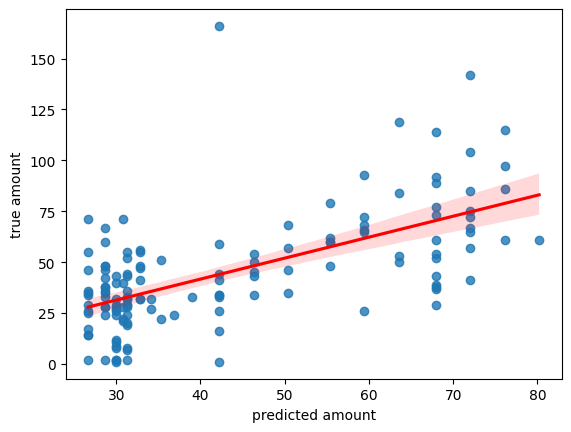

In [115]:
# Step 1: Make predictions using the trained model on the test data
predictions = model.predict(X_test_encoded)

# Step 2: Create a DataFrame to store the true total guests, predicted total guests, and the error
prediction_overview = pd.DataFrame()
prediction_overview["truth"] = y_test
prediction_overview["prediction"] = predictions

# Step 3: Calculate the absolute error
prediction_overview["error"] = prediction_overview["truth"] - prediction_overview["prediction"]
prediction_overview["error"] = abs(prediction_overview["error"]).astype(int)

# Step 4: Reset the index of the DataFrame
prediction_overview = prediction_overview.reset_index(drop=True)

# Display the prediction overview DataFrame
print(prediction_overview)
plot = sns.regplot(y=y_test.values.flatten(), x=predictions.flatten(), line_kws={"color": "r"})
plot.set_xlabel("predicted amount")
plot.set_ylabel("true amount")
plot
from sklearn.metrics import max_error
from sklearn.metrics import mean_squared_error
import math

me = max_error(y_test, predictions)
me = math.ceil(me)
print("Max Error:", me)

mse = mean_squared_error(y_test, predictions)
rmse = math.sqrt(mse)
rmse = math.ceil(rmse)
print("Root Mean Squared Error:", rmse)

### 🗳️ Conclusion
The first model, even though it was quite basic and used only a few factors, showed some good results. It predicted about 77% of the variation in the number of guests accurately, which is a decent start. It means that the type of day and the number of events at Effenaar have a noticeable effect on how many guests show up.

To make our predictions even better, new things have to be tried. First, more factors could be addded to the model, like weather conditions or special occasions happening nearby. Also, getting more data would help. The more information our model has, the smarter it gets.

Trying different ways of making predictions is also important. The first model was pretty simple, but there are other methods out there that might work better for the data.

So, while the first model did okay, there's still lots of room to make it better. By adding more factors, getting more data, and trying different methods, we hope to build a model that can predict the number of guests even more accurately in the future.

# Second model

## 🛠️ Preprocessing

### 🎯 Target variable

In [116]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
df["Day ID"] = encoder.fit_transform(df["Day"])
df["Season ID"] = encoder.fit_transform(df["Season"])
df.sample(10)

,Date,Day,Season,Total guests,PSV_Count,Effenaar_Count,Temperature,Rain,Duration rain,Max rain,Timezone max rain,Wind,Timezone max wind,Temperature difference,Day ID,Season ID
119,2023-11-17,Friday,Autumn,119.0,0.0,2.0,9.5,0.1,0.8,0.1,9.0,1.2,11.0,5.5,0,0
4,2024-03-11,Monday,Winter,45.0,0.0,0.0,8.4,21.0,18.8,3.3,13.0,2.0,10.0,6.6,1,3
35,2024-02-09,Friday,Winter,26.0,0.0,1.0,13.6,3.7,5.5,1.1,3.0,4.4,5.0,1.4,0,3
682,2022-02-06,Sunday,Winter,40.0,0.0,0.0,8.9,25.3,14.2,5.0,12.0,8.9,1.0,6.1,3,3
515,2022-08-21,Sunday,Summer,13.0,0.0,0.0,25.4,0.0,0.0,0.0,1.0,2.3,8.0,10.4,3,2
163,2023-10-04,Wednesday,Autumn,16.0,0.0,1.0,17.3,-0.1,0.0,-0.1,1.0,4.3,10.0,2.3,6,0
690,2022-01-29,Saturday,Winter,75.0,0.0,0.0,12.2,-0.1,0.0,-0.1,1.0,7.1,16.0,2.8,2,3
307,2023-05-13,Saturday,Spring,41.0,0.0,1.0,23.3,0.0,0.0,0.0,1.0,3.7,13.0,8.3,2,1
229,2023-07-30,Sunday,Summer,60.0,1.0,0.0,23.2,17.9,5.9,6.9,20.0,5.5,10.0,8.2,3,2
317,2023-05-03,Wednesday,Spring,29.0,0.0,0.0,16.2,0.0,0.0,0.0,1.0,3.8,13.0,1.2,6,1


### 💡 Feature selection

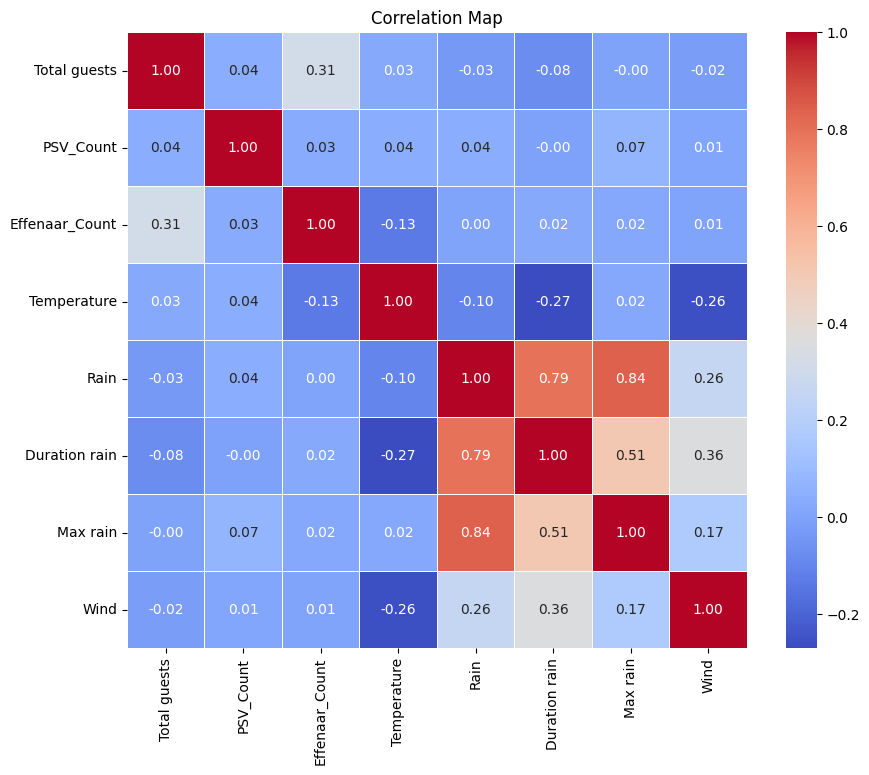

In [117]:
# Combine the relevant columns into a new DataFrame for correlation analysis
correlation_df = df[['Total guests', 'PSV_Count', 'Effenaar_Count', 'Temperature', 'Rain', 'Duration rain', 'Max rain', 'Wind']]

# Compute the correlation matrix
correlation_matrix = correlation_df.corr()

# Generate a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Map')
plt.show()

Upon examining the correlation map, we observe significant influences when PSV plays or if there's a concert at the Effenaar, both resulting in increased guest numbers. Additionally, a slight increase in guests is noticed with rising temperatures, although further data across the four seasons is necessary to confirm this trend. Conversely, rain negatively impacts guest numbers, whereas wind shows minimal effect on attendance.

In [125]:
features = ["Day ID", "Season ID", "PSV_Count", "Effenaar_Count", "Temperature", "Rain", "Duration rain", "Max rain", "Timezone max rain", "Wind", "Timezone max wind"]
target = "Total guests"
X = df[features]
y = df[target]

### 🪓 Splitting into train/test

In [126]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("There are in total", len(X), "observations, of which", len(X_train), "are now in the train set, and", len(X_test), "in the test set.")

There are in total 694 observations, of which 555 are now in the train set, and 139 in the test set.


### ⚖️ Scaling

In [127]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## 🧬 Modelling

In [128]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor()
model.fit(X_train, y_train)

score = model.score(X_test, y_test)
score

0.07210066114008429